In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\ACER\Desktop\Udaanous\Python\Python PDF\Messy data set.csv")

In [4]:
print(data)

     ID     Name         Age               Email    JoinDate    Salary
0     1    Alice          25   alice@example.com  01-01-2020     50000
1     2      Bob          30     bob@example.com  not a date     60000
2     2      Bob          30     bob@example.com  01-02-2020     60000
3     4  Charlie         NaN            charlie@  01-03-2020     70000
4     5    David  Twenty-two                 NaN  01-04-2020       NaN
5     6      Eve          45         eve@example  01-05-2020     90000
6     7    Frank          50  frank@@example.com  01-06-2020    100000
7     8    Grace          55   grace@example.com  01-07-2020  one lakh
8  nine    Heidi          60   heidi@example.com  2020.08.01    120000
9    10      NaN          65      10@example.com  01-09-2020    130000


In [5]:
# Read the raw lines manually
with open(r"C:\Users\ACER\Desktop\Udaanous\Python\Python PDF\Messy data set.csv", 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Split each line by comma
data = [line.strip().split(',') for line in lines]

# Create DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

print(df.head())



  ID     Name         Age              Email    JoinDate Salary
0  1    Alice          25  alice@example.com  01-01-2020  50000
1  2      Bob          30    bob@example.com  not a date  60000
2  2      Bob          30    bob@example.com  01-02-2020  60000
3  4  Charlie                       charlie@  01-03-2020  70000
4  5    David  Twenty-two                     01-04-2020       


In [6]:
df

,ID,Name,Age,Email,JoinDate,Salary
0,1,Alice,25,alice@example.com,01-01-2020,50000
1,2,Bob,30,bob@example.com,not a date,60000
2,2,Bob,30,bob@example.com,01-02-2020,60000
3,4,Charlie,,charlie@,01-03-2020,70000
4,5,David,Twenty-two,,01-04-2020,
5,6,Eve,45,eve@example,01-05-2020,90000
6,7,Frank,50,frank@@example.com,01-06-2020,100000
7,8,Grace,55,grace@example.com,01-07-2020,one lakh
8,nine,Heidi,60,heidi@example.com,2020.08.01,120000
9,10,,65,10@example.com,01-09-2020,130000


In [7]:
import pandas as pd
import numpy as np

# Convert empty strings to NaN
df.replace('', np.nan, inplace=True)

# Find missing values
missing_data = df.isnull().sum()
print("Missing Data:\n")
print(missing_data)


Missing Data:

ID          0
Name        1
Age         1
Email       1
JoinDate    0
Salary      1
dtype: int64


In [8]:
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')

# Convert Age → numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert Salary → numeric (handle 'one lakh' etc.)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Convert JoinDate → datetime
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')

# Name and Email stay as string (object)
df['Name'] = df['Name'].astype(str)
df['Email'] = df['Email'].astype(str)

# ✅ Check the updated types
print(df.dtypes)

# ✅ Optional: Check cleaned DataFrame
print(df)

ID                 float64
Name                object
Age                float64
Email               object
JoinDate    datetime64[ns]
Salary             float64
dtype: object
     ID     Name   Age               Email   JoinDate    Salary
0   1.0    Alice  25.0   alice@example.com 2020-01-01   50000.0
1   2.0      Bob  30.0     bob@example.com        NaT   60000.0
2   2.0      Bob  30.0     bob@example.com 2020-01-02   60000.0
3   4.0  Charlie   NaN            charlie@ 2020-01-03   70000.0
4   5.0    David   NaN                 nan 2020-01-04       NaN
5   6.0      Eve  45.0         eve@example 2020-01-05   90000.0
6   7.0    Frank  50.0  frank@@example.com 2020-01-06  100000.0
7   8.0    Grace  55.0   grace@example.com 2020-01-07       NaN
8   NaN    Heidi  60.0   heidi@example.com        NaT  120000.0
9  10.0      nan  65.0      10@example.com 2020-01-09  130000.0


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(strategy = "mean")

In [11]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(df[["Salary"]])
df[["Salary"]] = imputer.transform(df[["Salary"]])

In [12]:
df.dtypes

ID                 float64
Name                object
Age                float64
Email               object
JoinDate    datetime64[ns]
Salary             float64
dtype: object

In [13]:
unique_ages = df["ID"].unique()
print(unique_ages)

[ 1.  2.  4.  5.  6.  7.  8. nan 10.]


In [14]:
df["Salary"] = df["Salary"].astype(int)

In [15]:
df.Salary

0     50000
1     60000
2     60000
3     70000
4     85000
5     90000
6    100000
7     85000
8    120000
9    130000
Name: Salary, dtype: int32

In [16]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')  # Convert to numeric and set invalids to NaN
df["Age"] = df["Age"].fillna(df["Age"].mean())          # Fill NaN with mean (or use other logic)
df["Age"] = df["Age"].astype(int)                       # Now safe to convert to int

In [17]:
df.Age

0    25
1    30
2    30
3    45
4    45
5    45
6    50
7    55
8    60
9    65
Name: Age, dtype: int32

In [18]:
df["ID"] = pd.to_numeric(df["ID"], errors='coerce')  # Convert to numeric and set invalids to NaN
df["ID"] = df["ID"].fillna(df["ID"].mean())          # Fill NaN with mean (or use other logic)
df["ID"] = df["ID"].astype(int)                       # Now safe to convert to int

In [19]:
df.ID

0     1
1     2
2     2
3     4
4     5
5     6
6     7
7     8
8     5
9    10
Name: ID, dtype: int32

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df

,ID,Name,Age,Email,JoinDate,Salary
0,1,Alice,25,alice@example.com,2020-01-01,50000
1,2,Bob,30,bob@example.com,NaT,60000
2,2,Bob,30,bob@example.com,2020-01-02,60000
3,4,Charlie,45,charlie@,2020-01-03,70000
4,5,David,45,nan,2020-01-04,85000
5,6,Eve,45,eve@example,2020-01-05,90000
6,7,Frank,50,frank@@example.com,2020-01-06,100000
7,8,Grace,55,grace@example.com,2020-01-07,85000
8,5,Heidi,60,heidi@example.com,NaT,120000
9,10,nan,65,10@example.com,2020-01-09,130000


In [22]:
Table = {"ID" : [1,2,3,4,5,6,7,8,9,10],
        "Dpt":["DA","DS","ML","AI","BK","SF","CA","FI","HR","MR"],
        "City":["Mumbai","Delhi","Hy","Pune","Nasik","Panjab","Bang","USA","UK","Dubai"]}
TD = pd.DataFrame(Table)

In [23]:
TD

,ID,Dpt,City
0,1,DA,Mumbai
1,2,DS,Delhi
2,3,ML,Hy
3,4,AI,Pune
4,5,BK,Nasik
5,6,SF,Panjab
6,7,CA,Bang
7,8,FI,USA
8,9,HR,UK
9,10,MR,Dubai


In [24]:
joined_data = pd.merge(df,TD,on="ID",how="inner")
joined_data.head()

,ID,Name,Age,Email,JoinDate,Salary,Dpt,City
0,1,Alice,25,alice@example.com,2020-01-01,50000,DA,Mumbai
1,2,Bob,30,bob@example.com,NaT,60000,DS,Delhi
2,2,Bob,30,bob@example.com,2020-01-02,60000,DS,Delhi
3,4,Charlie,45,charlie@,2020-01-03,70000,AI,Pune
4,5,David,45,nan,2020-01-04,85000,BK,Nasik


In [25]:
Concatenated_data = pd.concat([df,TD])
Concatenated_data.head()

,ID,Name,Age,Email,JoinDate,Salary,Dpt,City
0,1,Alice,25.0,alice@example.com,2020-01-01,50000.0,NaN,NaN
1,2,Bob,30.0,bob@example.com,NaT,60000.0,NaN,NaN
2,2,Bob,30.0,bob@example.com,2020-01-02,60000.0,NaN,NaN
3,4,Charlie,45.0,charlie@,2020-01-03,70000.0,NaN,NaN
4,5,David,45.0,nan,2020-01-04,85000.0,NaN,NaN


In [26]:
df["Age"].value_counts()

Age
45    3
30    2
25    1
50    1
55    1
60    1
65    1
Name: count, dtype: int64

In [27]:
TD.describe()

,ID
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


In [28]:
grouped_var = df.groupby("Age")["Salary"].mean()

In [29]:
grouped_var

Age
25     50000.000000
30     60000.000000
45     81666.666667
50    100000.000000
55     85000.000000
60    120000.000000
65    130000.000000
Name: Salary, dtype: float64

In [30]:
pivot_table = df.pivot_table(index="Age",values=["Salary"],aggfunc={"Age":"count","Salary":"mean"})
#pivot_table = pivot_table.rename(columns={"Age":"C_Age","Salary":"Av_Salary","Age":"Av_Age"})
pivot_table

,Age,Salary
Age,,
25,1,50000.000000
30,2,60000.000000
45,3,81666.666667
50,1,100000.000000
55,1,85000.000000
60,1,120000.000000
65,1,130000.000000


In [31]:
cross_tab = pd.crosstab(df["Age"],df["Name"])
cross_tab

Name,Alice,Bob,Charlie,David,Eve,Frank,Grace,Heidi,nan
Age,,,,,,,,,
25,1,0,0,0,0,0,0,0,0
30,0,2,0,0,0,0,0,0,0
45,0,0,1,1,1,0,0,0,0
50,0,0,0,0,0,1,0,0,0
55,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,1,0
65,0,0,0,0,0,0,0,0,1


# Visualisation

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

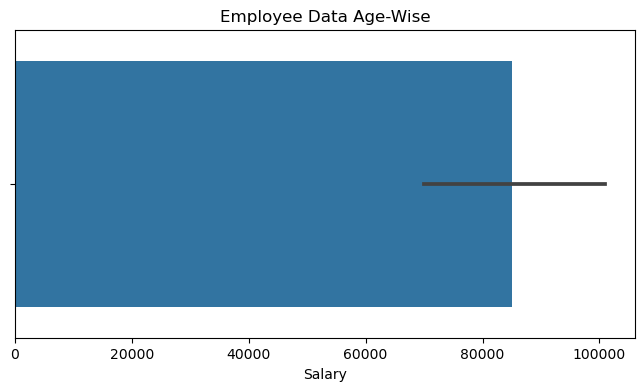

In [66]:
plt.figure(figsize=(8,4))
sns.barplot(x="Salary",data = df)
plt.title("Employee Data Age-Wise")
plt.show()

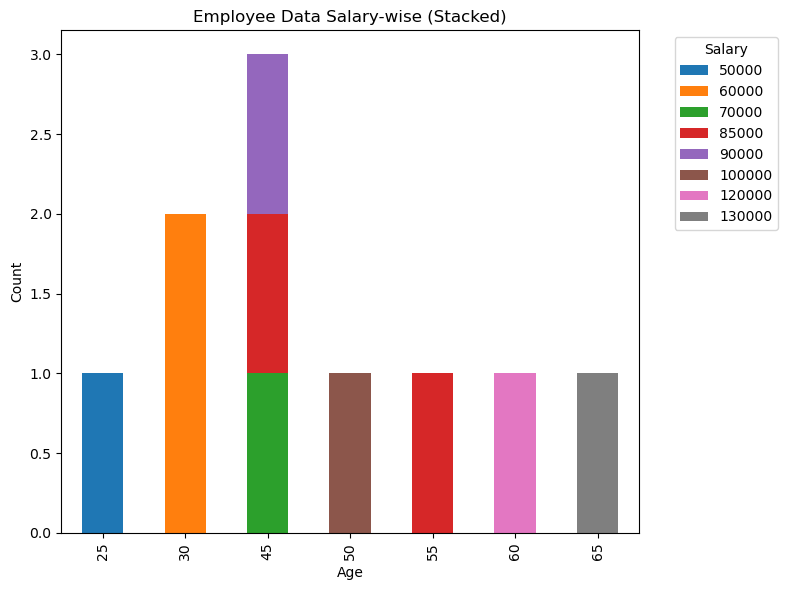

In [70]:
stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Employee Data Salary-wise (Stacked)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Salary", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


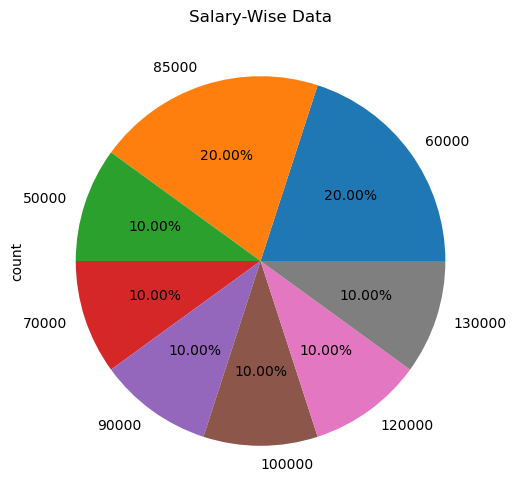

In [80]:
percentage = df["Salary"].value_counts()

plt.figure(figsize=(8,6))
percentage.plot(kind="pie",autopct="%1.2f%%")
plt.title("Salary-Wise Data")
#plt.ylable("Salary")
plt.show()

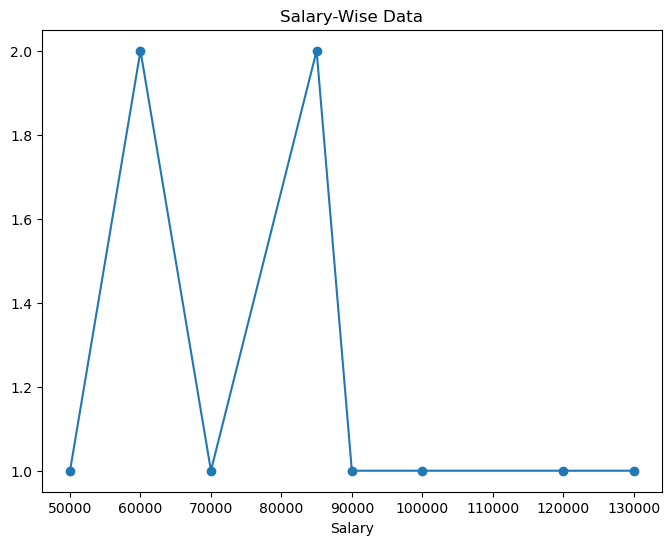

In [85]:
group_by = df.groupby("Salary").size()

plt.figure(figsize=(8,6))
group_by.plot(kind="line",marker="o")
plt.title("Salary-Wise Data")
#plt.ylable("Salary")
plt.show()

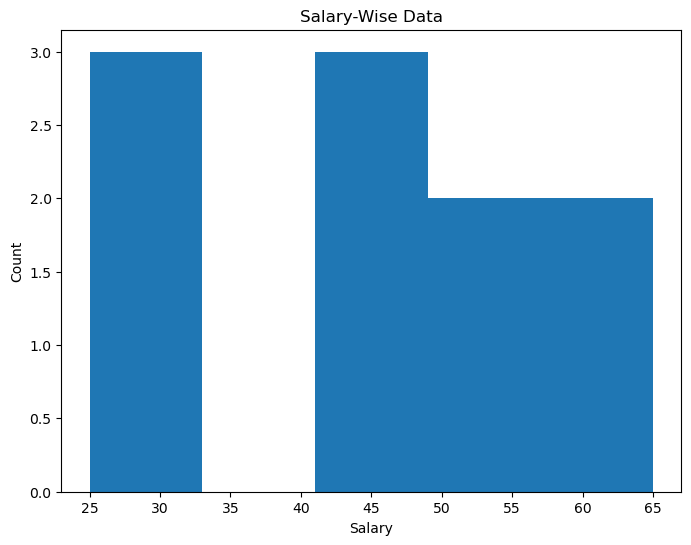

In [87]:
plt.figure(figsize=(8, 6))
df["Age"].plot(kind="hist",bins=5)
plt.title("Salary-Wise Data")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()
